# Creating Table for Busyness Prediction to give to ML Model for cleaned Subway Dataset 2019
- This notebook gets a busyness percentage for each station relative to how busy that station is in that week
- It does this using a normal distribution of the footfall traffic and difference in exit and entries
- Its final output is cleaned busyness data file


### Imports:

In [2]:
import pandas as pd

### Loading in Weather Data:


In [3]:

weather_data=pd.read_json('weatherData.json')

In [4]:
weather_data.head(10)

,lat,lon,timezone,timezone_offset,data
0,40.7834,-73.9663,America/New_York,-18000,"[{'dt': 1546300800, 'sunrise': 1546258795, 'su..."
1,40.7834,-73.9663,America/New_York,-18000,"[{'dt': 1546304400, 'sunrise': 1546258795, 'su..."
2,40.7834,-73.9663,America/New_York,-18000,"[{'dt': 1546308000, 'sunrise': 1546258795, 'su..."
3,40.7834,-73.9663,America/New_York,-18000,"[{'dt': 1546311600, 'sunrise': 1546258795, 'su..."
4,40.7834,-73.9663,America/New_York,-18000,"[{'dt': 1546315200, 'sunrise': 1546258795, 'su..."
5,40.7834,-73.9663,America/New_York,-18000,"[{'dt': 1546318800, 'sunrise': 1546345203, 'su..."
6,40.7834,-73.9663,America/New_York,-18000,"[{'dt': 1546322400, 'sunrise': 1546345203, 'su..."
7,40.7834,-73.9663,America/New_York,-18000,"[{'dt': 1546326000, 'sunrise': 1546345203, 'su..."
8,40.7834,-73.9663,America/New_York,-18000,"[{'dt': 1546329600, 'sunrise': 1546345203, 'su..."
9,40.7834,-73.9663,America/New_York,-18000,"[{'dt': 1546333200, 'sunrise': 1546345203, 'su..."


- Lat: 40.7834	Lon: -73.9663

### Extract what we need from the weather data:

In [5]:
# Create an empty DataFrame to store the venue data
df_weather = pd.DataFrame(columns=['Time Stamp','Temperature (C)', 'Weather Main', 'Rain 1h', 'Snow 1h'])

#select the first venue
for k in range(len(weather_data)):
    data=weather_data.loc[k]
    time_stamp=data['data'][0]['dt']
    temp=data['data'][0]['feels_like']-273.15#store in celsius
    weather_main=data['data'][0]['weather'][0]['main']
    try:
        rain_1h=data['data'][0]['rain']['1h']
    except KeyError:
        rain_1h='NA'
    
    try:
        snow_1h=data['data'][0]['snow']['1h']
    except KeyError:
        snow_1h='NA'

    #append the values information to the DataFrame
    df_weather.loc[k] = [time_stamp,temp,weather_main,rain_1h,snow_1h]


df_weather.head(20)


,Time Stamp,Temperature (C),Weather Main,Rain 1h,Snow 1h
0,1546300800,3.86,Rain,3.06,NA
1,1546304400,2.81,Rain,4.31,NA
2,1546308000,3.41,Rain,4.38,NA
3,1546311600,3.60,Rain,5.84,NA
4,1546315200,5.45,Rain,3.77,NA
5,1546318800,5.29,Rain,3.53,NA
6,1546322400,6.00,Rain,1.07,NA
7,1546326000,6.82,Mist,0.47,NA
8,1546329600,10.08,Mist,NA,NA
9,1546333200,10.38,Mist,0.25,NA


In [7]:
#set all NA values to 0
df_weather=df_weather.replace('NA',0)
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8761 entries, 0 to 8760
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time Stamp       8761 non-null   int64  
 1   Temperature (C)  8761 non-null   float64
 2   Weather Main     8761 non-null   object 
 3   Rain 1h          8761 non-null   float64
 4   Snow 1h          8761 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 410.7+ KB


In [8]:
#convert all float values to only 2 decimal places
df_weather['Temperature (C)']=df_weather['Temperature (C)'].round(2)
df_weather['Rain 1h']=df_weather['Rain 1h'].round(2)
df_weather['Snow 1h']=df_weather['Snow 1h'].round(2)

In [9]:
#save this to a file called cleanedWeatherData_2019.csv
df_weather.to_csv('cleanedWeatherData_2019.csv',index=False)

In [58]:
#group every 4 hours weather into an average of the 4 hours
df_four_hours = df_weather.copy()

for i in range(0, len(df_weather)):
    if i % 4 == 0 and i != 0:
        #this gives us every 4 hours of data from original dataset for all of 2019
        #insted get the mean of the temperature, rain and snow values
        #position at the most recent row in df_four_hours
        temp= df_weather.iloc[i-4:i]['Temperature (C)'].mean()
        rain = df_weather.iloc[i-4:i]['Rain 1h'].mean()
        snow = df_weather.iloc[i-4:i]['Snow 1h'].mean()
        #manually change the values of temp, rain and snow
        df_four_hours.iloc[i-4:i,1] = temp
        df_four_hours.iloc[i-4:i,4] = rain
        df_four_hours.iloc[i-4:i,5] = snow
    if i==0:
        df_four_hours[i] = df_weather.iloc[i]

#now keep every 4th row starting at 0
df_four_hours = df_four_hours.iloc[::4, :]
df_four_hours.head(20)


,Time Stamp,Temperature (C),Weather Main,Rain 1h,Snow 1h,0
0,1546300800,3.4200,Rain,3.06,4.3975,0.0
4,1546315200,5.8900,Rain,3.77,2.2100,0.0
8,1546329600,11.1750,Mist,0.00,0.1250,0.0
12,1546344000,13.5525,Rain,0.25,0.0625,0.0
16,1546358400,11.6800,Rain,0.50,0.2500,0.0
20,1546372800,3.6975,Clouds,0.00,0.0500,0.0
24,1546387200,2.0475,Clouds,0.00,0.0000,0.0
28,1546401600,-0.0575,Clouds,0.00,0.0000,0.0
32,1546416000,-2.0800,Clear,0.00,0.0000,0.0
36,1546430400,-1.8850,Clear,0.00,0.0000,0.0


In [59]:
#drop the last column
df_four_hours.drop(df_four_hours.columns[len(df_four_hours.columns)-1], axis=1, inplace=True)
df_four_hours.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2191 entries, 0 to 8760
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time Stamp       2191 non-null   int64  
 1   Temperature (C)  2191 non-null   float64
 2   Weather Main     2191 non-null   object 
 3   Rain 1h          2191 non-null   float64
 4   Snow 1h          2191 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 102.7+ KB


In [60]:
#reset the index
df_four_hours.reset_index(drop=True, inplace=True)
#keep temperature, rain and snow to 2 decimal places
df_four_hours['Temperature (C)'] = df_four_hours['Temperature (C)'].round(2)
df_four_hours['Rain 1h'] = df_four_hours['Rain 1h'].round(2)
df_four_hours['Snow 1h'] = df_four_hours['Snow 1h'].round(2)
df_four_hours.head(10)

,Time Stamp,Temperature (C),Weather Main,Rain 1h,Snow 1h
0,1546300800,3.42,Rain,3.06,4.40
1,1546315200,5.89,Rain,3.77,2.21
2,1546329600,11.18,Mist,0.00,0.12
3,1546344000,13.55,Rain,0.25,0.06
4,1546358400,11.68,Rain,0.50,0.25
5,1546372800,3.70,Clouds,0.00,0.05
6,1546387200,2.05,Clouds,0.00,0.00
7,1546401600,-0.06,Clouds,0.00,0.00
8,1546416000,-2.08,Clear,0.00,0.00
9,1546430400,-1.88,Clear,0.00,0.00


In [61]:
#drop time after 1577476800
df_four_hours.drop(df_four_hours[df_four_hours['Time Stamp'] > 1577476800].index, inplace = True)

In [62]:
#save 4 hour data to csv
df_four_hours.to_csv('cleanedWeatherData_2019_4hour.csv',index=False)

### Loading in Subway Data:


In [63]:
turnstile_data=pd.read_csv('cleaned_turnstile_data.csv')
    

In [64]:
turnstile_data.head()

,turnstile_id,remote_unit_id,time_stamp,station_name,entries,exits
0,R138 R293 00-03-03,293,1546290000,34 ST-PENN STA,0,0
1,R138 R293 00-02-05,293,1546290000,34 ST-PENN STA,0,0
2,R138 R293 00-02-03,293,1546290000,34 ST-PENN STA,0,0
3,R138 R293 00-00-02,293,1546290000,34 ST-PENN STA,0,0
4,R138 R293 00-03-01,293,1546290000,34 ST-PENN STA,0,0


### Creating busyness percentage for each station
- For each remote unit id and time condense to one row relating to busyness of that station at that time
- The busyness of a place is how many people are currently there, so exits-entries along with the magnitude in the sum of both values, can do both
- Sum of entries and exits for each remote unit id at that time
- Exits - entries for each remote unit id at that time
- Normalize each of these values

In [65]:
grouped_turnstile_data=turnstile_data.groupby(['remote_unit_id', 'time_stamp']).agg({'entries': 'max', 'exits': 'max'}).reset_index()

grouped_turnstile_data.head()

,remote_unit_id,time_stamp,entries,exits
0,1,1546300800,0,0
1,1,1546315200,102,104
2,1,1546329600,96,51
3,1,1546344000,260,476
4,1,1546358400,540,496


In [66]:
len(grouped_turnstile_data)

297994

In [67]:
#drop rows before time of 1546300800
grouped_turnstile_data.drop(grouped_turnstile_data[grouped_turnstile_data['time_stamp'] < 1546300800].index, inplace = True)

In [68]:
#add two new columns, one for difference between exits and entries as a proxy for surplus people in that area
#the other for the addition of exits and entries as a proxy for busyness in that area by volume
grouped_turnstile_data['num_people_exited']=grouped_turnstile_data['exits']-grouped_turnstile_data['entries']
#remove negative values and set to zero
#grouped_turnstile_data['num_people_exited']=grouped_turnstile_data['num_people_exited'].apply(lambda x: 0 if x<0 else x)

grouped_turnstile_data['sum_exit_entry']=grouped_turnstile_data['exits']+grouped_turnstile_data['entries']

grouped_turnstile_data.head(10)


,remote_unit_id,time_stamp,entries,exits,num_people_exited,sum_exit_entry
0,1,1546300800,0,0,0,0
1,1,1546315200,102,104,2,206
2,1,1546329600,96,51,-45,147
3,1,1546344000,260,476,216,736
4,1,1546358400,540,496,-44,1036
5,1,1546372800,602,250,-352,852
6,1,1546387200,159,147,-12,306
7,1,1546401600,48,38,-10,86
8,1,1546416000,516,434,-82,950
9,1,1546430400,842,1351,509,2193


In [69]:
grouped_turnstile_data.head()

,remote_unit_id,time_stamp,entries,exits,num_people_exited,sum_exit_entry
0,1,1546300800,0,0,0,0
1,1,1546315200,102,104,2,206
2,1,1546329600,96,51,-45,147
3,1,1546344000,260,476,216,736
4,1,1546358400,540,496,-44,1036


In [70]:
#add a week number column to group further
#how many seconds in a week?
week=604800
start=1546300800
for i in range(0,52):
    current_time=start+week*i
    #for all the timestamps in the week set week number column to i
    mask = (grouped_turnstile_data['time_stamp'] >= current_time) & (grouped_turnstile_data['time_stamp'] < current_time + week)
    grouped_turnstile_data.loc[mask, 'week_num'] = i+1
#change week num to int
grouped_turnstile_data['week_num']=grouped_turnstile_data['week_num'].astype(int)


grouped_turnstile_data.head(10)

,remote_unit_id,time_stamp,entries,exits,num_people_exited,sum_exit_entry,week_num
0,1,1546300800,0,0,0,0,1
1,1,1546315200,102,104,2,206,1
2,1,1546329600,96,51,-45,147,1
3,1,1546344000,260,476,216,736,1
4,1,1546358400,540,496,-44,1036,1
5,1,1546372800,602,250,-352,852,1
6,1,1546387200,159,147,-12,306,1
7,1,1546401600,48,38,-10,86,1
8,1,1546416000,516,434,-82,950,1
9,1,1546430400,842,1351,509,2193,1


In [71]:
#change week num to int
grouped_turnstile_data['week_num']=grouped_turnstile_data['week_num'].astype(int)


grouped_turnstile_data.head(10)

,remote_unit_id,time_stamp,entries,exits,num_people_exited,sum_exit_entry,week_num
0,1,1546300800,0,0,0,0,1
1,1,1546315200,102,104,2,206,1
2,1,1546329600,96,51,-45,147,1
3,1,1546344000,260,476,216,736,1
4,1,1546358400,540,496,-44,1036,1
5,1,1546372800,602,250,-352,852,1
6,1,1546387200,159,147,-12,306,1
7,1,1546401600,48,38,-10,86,1
8,1,1546416000,516,434,-82,950,1
9,1,1546430400,842,1351,509,2193,1


In [72]:
grouped_turnstile_data.tail()

,remote_unit_id,time_stamp,entries,exits,num_people_exited,sum_exit_entry,week_num
297989,572,1577419200,29,80,51,109,52
297990,572,1577433600,237,212,-25,449,52
297991,572,1577448000,631,438,-193,1069,52
297992,572,1577462400,551,500,-51,1051,52
297993,572,1577476800,586,612,26,1198,52


### Use of z-score
- A z-score quantifies the distance between a data point and the mean of a distribution in terms of standard deviations. It indicates how many standard deviations an observation is above or below the mean of a distribution. 

In [73]:
#first get a new dataframe for each remote_unit_id
for i in range(0, len(grouped_turnstile_data['remote_unit_id'].unique())):
    #get the remote_unit_id
    remote_unit_id=grouped_turnstile_data['remote_unit_id'].unique()[i]
    #give the new dataframe the name of the remote unit id
    df=grouped_turnstile_data[grouped_turnstile_data['remote_unit_id']==remote_unit_id]
    #reset the index
    df.reset_index(drop=True, inplace=True)
    #write it to the folder
    df.to_csv('turnstile_data/df_'+str(remote_unit_id)+'.csv',index=False)


In [74]:
#get a standardized z score for each remote unit id based on the busyness of that week number
from sklearn.preprocessing import StandardScaler

#function to be applied to each group
def standardize_group(group):
    scaler = StandardScaler()
    group[['z_score_num_people_exited', 'z_score_sum_exit_entry']] = scaler.fit_transform(group[['num_people_exited', 'sum_exit_entry']])
    return group

standardized_turnstile_data=pd.DataFrame()
#apply the function to each group in each turnstile_data remote unit id file
for i in range(0, len(grouped_turnstile_data['remote_unit_id'].unique())):
    #get the remote_unit_id
    remote_unit_id=grouped_turnstile_data['remote_unit_id'].unique()[i]
    #read in the file
    df=pd.read_csv('turnstile_data/df_'+str(remote_unit_id)+'.csv')
    #apply the function
    df = df.groupby('week_num', group_keys=True).apply(standardize_group)
    #write it to the folder
    df.to_csv('turnstile_data/df_'+str(remote_unit_id)+'.csv',index=False)
    #append to the standardized_turnstile_data
    standardized_turnstile_data=standardized_turnstile_data.append(df, ignore_index=True)
    
standardized_turnstile_data.head(10)

/tmp/ipykernel_38182/3398862924.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  standardized_turnstile_data=standardized_turnstile_data.append(df, ignore_index=True)
/tmp/ipykernel_38182/3398862924.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  standardized_turnstile_data=standardized_turnstile_data.append(df, ignore_index=True)
/tmp/ipykernel_38182/3398862924.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  standardized_turnstile_data=standardized_turnstile_data.append(df, ignore_index=True)
/tmp/ipykernel_38182/3398862924.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  standardized_turnstile_data=standardized_turns

,remote_unit_id,time_stamp,entries,exits,num_people_exited,sum_exit_entry,week_num,z_score_num_people_exited,z_score_sum_exit_entry
0,1,1546300800,0,0,0,0,1,0.266713,-1.187825
1,1,1546315200,102,104,2,206,1,0.272667,-0.910509
2,1,1546329600,96,51,-45,147,1,0.132754,-0.989934
3,1,1546344000,260,476,216,736,1,0.909716,-0.197025
4,1,1546358400,540,496,-44,1036,1,0.135731,0.206833
5,1,1546372800,602,250,-352,852,1,-0.781144,-0.040867
6,1,1546387200,159,147,-12,306,1,0.230991,-0.775889
7,1,1546401600,48,38,-10,86,1,0.236944,-1.072052
8,1,1546416000,516,434,-82,950,1,0.022610,0.091061
9,1,1546430400,842,1351,509,2193,1,1.781938,1.764382


In [75]:
#convert the z-score to a percentile, we want % busyness after all
from scipy.stats import norm
grouped_turnstile_data=standardized_turnstile_data.copy()

grouped_turnstile_data['percentile_num_people_exited'] = norm.cdf(grouped_turnstile_data['z_score_num_people_exited'])

grouped_turnstile_data['percentile_sum_exit_entry'] = norm.cdf(grouped_turnstile_data['z_score_sum_exit_entry'])

grouped_turnstile_data.head(10)

,remote_unit_id,time_stamp,entries,exits,num_people_exited,sum_exit_entry,week_num,z_score_num_people_exited,z_score_sum_exit_entry,percentile_num_people_exited,percentile_sum_exit_entry
0,1,1546300800,0,0,0,0,1,0.266713,-1.187825,0.605155,0.117451
1,1,1546315200,102,104,2,206,1,0.272667,-0.910509,0.607445,0.181277
2,1,1546329600,96,51,-45,147,1,0.132754,-0.989934,0.552806,0.161103
3,1,1546344000,260,476,216,736,1,0.909716,-0.197025,0.818514,0.421904
4,1,1546358400,540,496,-44,1036,1,0.135731,0.206833,0.553983,0.581930
5,1,1546372800,602,250,-352,852,1,-0.781144,-0.040867,0.217359,0.483701
6,1,1546387200,159,147,-12,306,1,0.230991,-0.775889,0.591339,0.218907
7,1,1546401600,48,38,-10,86,1,0.236944,-1.072052,0.593650,0.141848
8,1,1546416000,516,434,-82,950,1,0.022610,0.091061,0.509019,0.536278
9,1,1546430400,842,1351,509,2193,1,1.781938,1.764382,0.962620,0.961166


In [76]:
df_busyness=grouped_turnstile_data[['remote_unit_id', 'time_stamp', 'entries', 'exits','percentile_num_people_exited','percentile_sum_exit_entry']].copy()
df_busyness.tail(10)

,remote_unit_id,time_stamp,entries,exits,percentile_num_people_exited,percentile_sum_exit_entry
297901,572,1577347200,214,200,0.397445,0.299820
297902,572,1577361600,523,393,0.104401,0.808839
297903,572,1577376000,476,400,0.213949,0.777026
297904,572,1577390400,540,635,0.750725,0.944665
297905,572,1577404800,119,379,0.981905,0.385564
297906,572,1577419200,29,80,0.617393,0.084623
297907,572,1577433600,237,212,0.361482,0.334540
297908,572,1577448000,631,438,0.036066,0.903178
297909,572,1577462400,551,500,0.281651,0.894301
297910,572,1577476800,586,612,0.533389,0.951469


### Explain the new columns:
- Percentile_num_people_exited is a normalized percentage for each station (remote unit id). A value of ~0.5 indicates the same number of entries and exits. A value lower than ~0.5 indicates more entries than exits. A value higher than ~0.5 indicates more exits than entries.
- I see this as a useful metric as the more exits there are than entries the busier the surrounding area is likely to be.
- This column can be used for a more general busyness prediction of areas around stations.
- Percentile_sum_exit_entry is a normalized percentage for each station (remote unit id). The higher the value the greater the total entries and exits in that time period.
- I see this as a useful metric as it is a proxy for the footfall in a station at a certain time.
- This column can be used for a more specific busyness prediciton of each station.



#### Tidy up the columns and names

In [77]:
#change the new columns to percentages and no decimal places
df_busyness['percentile_num_people_exited']=df_busyness['percentile_num_people_exited'].apply(lambda x: round(x*100,2))
df_busyness['percentile_sum_exit_entry']=df_busyness['percentile_sum_exit_entry'].apply(lambda x: round(x*100,2))
#change the names of the new columns
df_busyness.rename(columns={'percentile_num_people_exited':'surrounding_area_busyness', 'percentile_sum_exit_entry':'station_busyness'}, inplace=True)
df_busyness.head(10)

,remote_unit_id,time_stamp,entries,exits,surrounding_area_busyness,station_busyness
0,1,1546300800,0,0,60.52,11.75
1,1,1546315200,102,104,60.74,18.13
2,1,1546329600,96,51,55.28,16.11
3,1,1546344000,260,476,81.85,42.19
4,1,1546358400,540,496,55.40,58.19
5,1,1546372800,602,250,21.74,48.37
6,1,1546387200,159,147,59.13,21.89
7,1,1546401600,48,38,59.37,14.18
8,1,1546416000,516,434,50.90,53.63
9,1,1546430400,842,1351,96.26,96.12


In [78]:
#round to the nearest percent and convert to int
df_busyness['surrounding_area_busyness']=df_busyness['surrounding_area_busyness'].apply(lambda x: int(round(x)))
df_busyness['station_busyness']=df_busyness['station_busyness'].apply(lambda x: int(round(x)))
df_busyness.tail(20)

,remote_unit_id,time_stamp,entries,exits,surrounding_area_busyness,station_busyness
297891,572,1577203200,570,460,14,88
297892,572,1577217600,407,532,82,83
297893,572,1577232000,144,260,80,29
297894,572,1577246400,25,101,70,9
297895,572,1577260800,64,70,46,10
297896,572,1577275200,224,157,24,27
297897,572,1577289600,315,228,19,43
297898,572,1577304000,253,321,67,47
297899,572,1577318400,115,243,83,25
297900,572,1577332800,23,70,60,8


### For training the model:
- Include the day, time of day and weather for each row, but first fix the timestamps so they align with the weather


In [79]:

#fix timestamps
#map timestamp to the nearest block of 4 hours in unix time
#this will be used to merge with the weather data

def map_to_nearest_four_hour_block(timestamp):
    base_time = 1546300800
    time_diff = timestamp - base_time
    four_hour_block = round(time_diff / (4 * 3600)) * (4 * 3600)
    mapped_timestamp = base_time+ four_hour_block
    return mapped_timestamp

df_busyness['time_stamp'] = df_busyness['time_stamp'].apply(lambda x: map_to_nearest_four_hour_block(x))


In [80]:
#add hour of the day column
df_busyness['hour']=pd.to_datetime(df_busyness['time_stamp'], unit='s').dt.hour
#add day column
df_busyness['day']=pd.to_datetime(df_busyness['time_stamp'], unit='s').dt.day_name()
#add day of the month and month, eg 1 January
df_busyness['month']=pd.to_datetime(df_busyness['time_stamp'], unit='s').dt.month_name()

df_busyness.head(10)


,remote_unit_id,time_stamp,entries,exits,surrounding_area_busyness,station_busyness,hour,day,month
0,1,1546300800,0,0,61,12,0,Tuesday,January
1,1,1546315200,102,104,61,18,4,Tuesday,January
2,1,1546329600,96,51,55,16,8,Tuesday,January
3,1,1546344000,260,476,82,42,12,Tuesday,January
4,1,1546358400,540,496,55,58,16,Tuesday,January
5,1,1546372800,602,250,22,48,20,Tuesday,January
6,1,1546387200,159,147,59,22,0,Wednesday,January
7,1,1546401600,48,38,59,14,4,Wednesday,January
8,1,1546416000,516,434,51,54,8,Wednesday,January
9,1,1546430400,842,1351,96,96,12,Wednesday,January


In [81]:
df_busyness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297911 entries, 0 to 297910
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   remote_unit_id             297911 non-null  int64 
 1   time_stamp                 297911 non-null  int64 
 2   entries                    297911 non-null  int64 
 3   exits                      297911 non-null  int64 
 4   surrounding_area_busyness  297911 non-null  int64 
 5   station_busyness           297911 non-null  int64 
 6   hour                       297911 non-null  int64 
 7   day                        297911 non-null  object
 8   month                      297911 non-null  object
dtypes: int64(7), object(2)
memory usage: 20.5+ MB


- Missing last 4 days of Subway data in 2019 for every station

### Map the weather to each station for each time interval

In [82]:
#load in weather data
df_four=pd.read_csv('cleanedWeatherData_2019_4hour.csv')

In [83]:
df_four.head()

,Time Stamp,Temperature (C),Weather Main,Rain 1h,Snow 1h
0,1546300800,3.42,Rain,3.06,4.40
1,1546315200,5.89,Rain,3.77,2.21
2,1546329600,11.18,Mist,0.00,0.12
3,1546344000,13.55,Rain,0.25,0.06
4,1546358400,11.68,Rain,0.50,0.25


In [84]:
#create a mask that assigns each row in df_busyness to a 4 hour period
#based on timestamp value being the same
for i in range(len(df_four)):
    #every timestamp in df_weather that is equivalent to df_four[i] gets new columns added with the weather data from that timestamp in df_four
    mask = (df_busyness['time_stamp'] == df_four['Time Stamp'][i])
    df_busyness.loc[mask, 'Temperature (C)'] = df_four['Temperature (C)'][i]
    df_busyness.loc[mask, 'Weather Main'] = df_four['Weather Main'][i]
    df_busyness.loc[mask, 'Rain 1h'] = df_four['Rain 1h'][i]
    df_busyness.loc[mask, 'Snow 1h'] = df_four['Snow 1h'][i]


df_busyness.head(10)

,remote_unit_id,time_stamp,entries,exits,surrounding_area_busyness,station_busyness,hour,day,month,Temperature (C),Weather Main,Rain 1h,Snow 1h
0,1,1546300800,0,0,61,12,0,Tuesday,January,3.42,Rain,3.06,4.40
1,1,1546315200,102,104,61,18,4,Tuesday,January,5.89,Rain,3.77,2.21
2,1,1546329600,96,51,55,16,8,Tuesday,January,11.18,Mist,0.00,0.12
3,1,1546344000,260,476,82,42,12,Tuesday,January,13.55,Rain,0.25,0.06
4,1,1546358400,540,496,55,58,16,Tuesday,January,11.68,Rain,0.50,0.25
5,1,1546372800,602,250,22,48,20,Tuesday,January,3.70,Clouds,0.00,0.05
6,1,1546387200,159,147,59,22,0,Wednesday,January,2.05,Clouds,0.00,0.00
7,1,1546401600,48,38,59,14,4,Wednesday,January,-0.06,Clouds,0.00,0.00
8,1,1546416000,516,434,51,54,8,Wednesday,January,-2.08,Clear,0.00,0.00
9,1,1546430400,842,1351,96,96,12,Wednesday,January,-1.88,Clear,0.00,0.00


In [85]:
# set surrounding area busyness to 0 if it is less than 40
df_busyness['surrounding_area_busyness']=df_busyness['surrounding_area_busyness'].apply(lambda x: 0 if x<40 else x)

In [86]:
#show null rows
df_busyness[df_busyness.isnull().any(axis=1)]


,remote_unit_id,time_stamp,entries,exits,surrounding_area_busyness,station_busyness,hour,day,month,Temperature (C),Weather Main,Rain 1h,Snow 1h
6798,11,1577491200,668,1312,61,66,0,Saturday,December,NaN,NaN,NaN,NaN
9093,12,1577491200,683,1319,68,79,0,Saturday,December,NaN,NaN,NaN,NaN
11187,13,1577491200,326,819,75,69,0,Saturday,December,NaN,NaN,NaN,NaN
17646,16,1577491200,165,148,0,51,0,Saturday,December,NaN,NaN,NaN,NaN
19791,17,1577491200,463,326,0,55,0,Saturday,December,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262854,323,1577491200,215,358,95,63,0,Saturday,December,NaN,NaN,NaN,NaN
267004,330,1577491200,237,268,49,78,0,Saturday,December,NaN,NaN,NaN,NaN
279385,344,1577491200,116,20,62,45,0,Saturday,December,NaN,NaN,NaN,NaN
281432,345,1577491200,80,338,92,66,0,Saturday,December,NaN,NaN,NaN,NaN


In [87]:
#drop these rows
df_busyness.dropna(inplace=True)


In [88]:
df_busyness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297835 entries, 0 to 297910
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   remote_unit_id             297835 non-null  int64  
 1   time_stamp                 297835 non-null  int64  
 2   entries                    297835 non-null  int64  
 3   exits                      297835 non-null  int64  
 4   surrounding_area_busyness  297835 non-null  int64  
 5   station_busyness           297835 non-null  int64  
 6   hour                       297835 non-null  int64  
 7   day                        297835 non-null  object 
 8   month                      297835 non-null  object 
 9   Temperature (C)            297835 non-null  float64
 10  Weather Main               297835 non-null  object 
 11  Rain 1h                    297835 non-null  float64
 12  Snow 1h                    297835 non-null  float64
dtypes: float64(3), int64(7), obje

In [89]:
#change the column names
df_busyness.rename(columns={'Temperature (C)':'temperature', 'Weather Main': 'weather', 'Rain 1h':'rain_fall','Snow 1h': 'snow_fall'}, inplace=True)

In [90]:
#ready to train model now with this dataset
df_busyness.to_csv('cleaned_busyness_data.csv',index=False)

### Plots for data visualization:
- Subway data- plot each station by largest total entries and exits for the year
- BestTime api- show busyness of statue of liberty for the week?
- Weather data- plot rainfall for the each month?

In [91]:
# Copy the data
subway_plot = turnstile_data.copy()

# Group by 'remote_unit_id' and calculate the total 'entries' and 'exits'

subway_plot = subway_plot.groupby('remote_unit_id')['entries', 'exits'].sum().reset_index()

# Calculate the total entries and exits and add a new column
subway_plot['total_entries_exits'] = subway_plot['entries'] + subway_plot['exits']

# Sort the DataFrame by 'total_entries_exits' in descending order
subway_plot = subway_plot.sort_values('total_entries_exits', ascending=False)

# Convert the DataFrame to a list
plot = subway_plot[['remote_unit_id', 'total_entries_exits']].values.tolist()

#look up the remote unit id in the cleaned_station_data.csv file
station_data=pd.read_csv('cleaned_station_data.csv')
#check how many unique station names there are
print(len(station_data['station_name'].unique()))
#check how many unique remote unit ids there are
print(len(station_data['remote_unit_id'].unique()))

for i in range(len(plot)):
    if plot[i][0] in station_data['remote_unit_id'].values:
        plot[i][0]=station_data[station_data['remote_unit_id']==plot[i][0]]['station_name'].values[0]

#sort in descending order
plot.sort(key=lambda x: x[1], reverse=True)

# Print the top 10 stations
#print(plot[0:10])


/tmp/ipykernel_38182/4026529364.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  subway_plot = subway_plot.groupby('remote_unit_id')['entries', 'exits'].sum().reset_index()


86
143


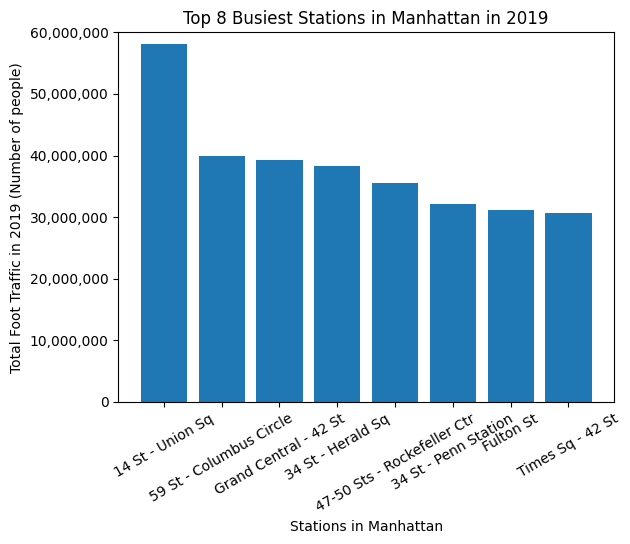

In [92]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

remote_id = [entry[0] for entry in plot[:8]]  # Get the top 10 stations
total_volume = [entry[1] for entry in plot[:8]]  # Get the total volume for each station

# Define the desired range for the y-axis
y_min = 0
y_max = 60000000

plt.bar(remote_id, total_volume)
plt.xlabel('Stations in Manhattan')
plt.ylabel('Total Foot Traffic in 2019 (Number of people)')
plt.title('Top 8 Busiest Stations in Manhattan in 2019')

# Format the y-axis labels with commas and set the range
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylim(y_min, y_max)

plt.xticks(rotation=30)
plt.show()


In [93]:
# add the total volume to get total foot traffic value
tot = sum(entry[1] for entry in plot)
tot

1642167565